In [1]:
import cv2
from matplotlib import pyplot as plt
from skimage import data
import numpy as np
from skimage.color import rgb2hed, hed2rgb

In [3]:
print(cv2. __version__)
print(np.__version__)
!python -V

4.10.0
1.26.4
Python 3.10.12


In [14]:
img = cv2.imread('/content/Laplace.png', cv2.IMREAD_GRAYSCALE)
print(img.shape)

(1200, 746)


In [18]:
def apply_2d_convolution(image, kernel):
    # Get the dimensions of the input image and the kernel
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Pad the image with zeros (to handle edges)
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Prepare an output image
    output_image = np.zeros_like(image)

    # Perform the convolution
    for i in range(img_height):
        for j in range(img_width):
            # Extract the region of interest (ROI) from the padded image
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            # Element-wise multiplication and sum the result
            output_value = np.sum(region * kernel)
            output_value = max(min(255, output_value), 0)
            # Set the output value at the current position
            output_image[i, j] = output_value

    return output_image

0 255


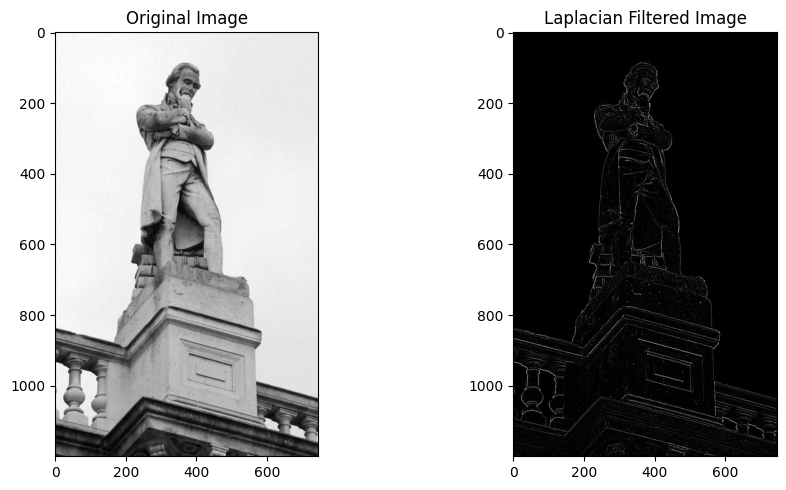

In [28]:
laplacian_kernel = np.array([[1, 1, 1],
                             [1, -8, 1],
                             [1, 1, 1]])

laplacian_image = apply_2d_convolution(img, laplacian_kernel)
print(np.min(laplacian_image), np.max(laplacian_image))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Laplacian Filtered Image')
plt.imshow(laplacian_image, cmap='gray')

plt.tight_layout()
plt.show()

-558.0 522.0


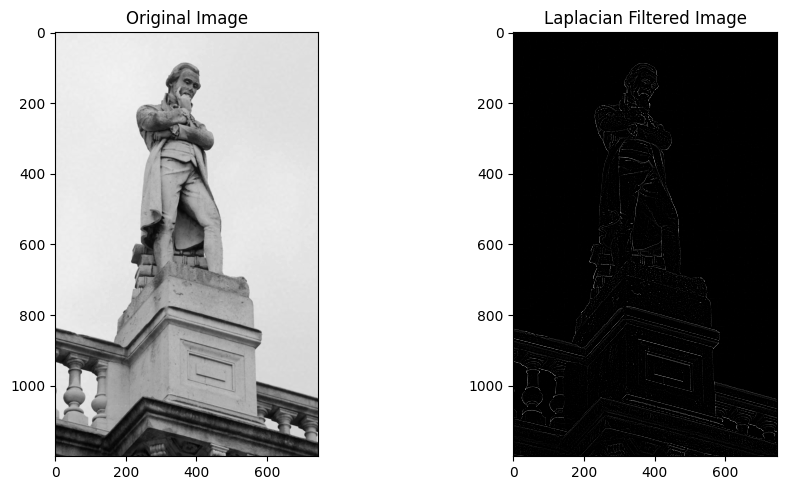

In [27]:
laplacian_image = cv2.filter2D(img.astype(np.float64), cv2.CV_64F, laplacian_kernel)
print(np.min(laplacian_image), np.max(laplacian_image))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.title('Laplacian Filtered Image')
plt.imshow(laplacian_image, cmap='gray', vmin=0, vmax=255)

plt.tight_layout()
plt.show()